In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from numpy import expand_dims
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
!ls "/content/drive/My Drive/Colab Notebooks"

JanataHack.ipynb	       submission1.csv	submission.csv	  train
sample_submission_yxjOnvz.csv  submission2.csv	test_vc2kHdQ.csv  train.csv


In [5]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [6]:
train['image_names'] = train['image_names'].map(lambda x: x.rstrip('.jpg'))
train.head()

,image_names,emergency_or_not
0,1503,0
1,1420,0
2,1764,0
3,1356,0
4,1117,0


In [7]:
train.shape

(1646, 2)

In [8]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('/content/drive/My Drive/Colab Notebooks/train/'+train['image_names'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 1646/1646 [06:38<00:00,  4.13it/s]


In [ ]:
X.shape

(1646, 400, 400, 3)

In [ ]:
train['emergency_or_not'][2]

0

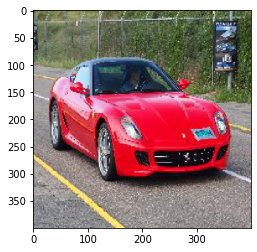

In [19]:
plt.imshow(X[2])

In [22]:
y = np.array(train.drop(['image_names'],axis=1))
y.shape

(1646, 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.1)

In [24]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 396, 396, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 198, 198, 16)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 198, 198, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 32)      12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 97, 97, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 97, 97, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 93, 93, 64)       

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test), batch_size=64)

Train on 1481 samples, validate on 165 samples
Epoch 1/6
1481/1481 [==============================] - 468s 316ms/step - loss: 0.7373 - accuracy: 0.5550 - val_loss: 0.6842 - val_accuracy: 0.6000
Epoch 2/6
1481/1481 [==============================] - 467s 315ms/step - loss: 0.6485 - accuracy: 0.6239 - val_loss: 0.6395 - val_accuracy: 0.6424
Epoch 3/6
1481/1481 [==============================] - 467s 315ms/step - loss: 0.6219 - accuracy: 0.6664 - val_loss: 0.5252 - val_accuracy: 0.7455
Epoch 4/6
1481/1481 [==============================] - 470s 317ms/step - loss: 0.5959 - accuracy: 0.7083 - val_loss: 0.5494 - val_accuracy: 0.7455
Epoch 5/6
1481/1481 [==============================] - 470s 318ms/step - loss: 0.5277 - accuracy: 0.7353 - val_loss: 0.4488 - val_accuracy: 0.8121
Epoch 6/6
1481/1481 [==============================] - 473s 319ms/step - loss: 0.4878 - accuracy: 0.7691 - val_loss: 0.4489 - val_accuracy: 0.8303


In [28]:
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_vc2kHdQ.csv')

In [29]:
test['image_names'] = test['image_names'].map(lambda x: x.rstrip('.jpg'))
test.head()

,image_names
0,1960
1,668
2,2082
3,808
4,1907


In [39]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('/content/drive/My Drive/Colab Notebooks/train/'+test['image_names'][i]+'.jpg',target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)

100%|██████████| 706/706 [02:54<00:00,  4.04it/s]


In [40]:
classes = np.array(train.columns[1:])
proba = model.predict(test_image[0].reshape(1,400,400,3))

In [41]:
data = []
for i in tqdm(range(test.shape[0])):
    proba = model.predict(test_image[i].reshape(1,400,400,3))
    data.append((proba))

100%|██████████| 706/706 [02:17<00:00,  5.14it/s]


In [42]:
df_result = pd.DataFrame(np.array(data).reshape(706,1), columns = ['emergency_or_not'])
df_result.head()

,emergency_or_not
0,0.098718
1,0.786112
2,0.193036
3,0.955881
4,0.042208


In [43]:
df_result.emergency_or_not.describe()

count    706.000000
mean       0.448593
std        0.251361
min        0.004232
25%        0.243761
50%        0.404788
75%        0.611230
max        0.998873
Name: emergency_or_not, dtype: float64

In [44]:
sub = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sample_submission_yxjOnvz.csv')

In [45]:
sub.drop('emergency_or_not', axis = 1, inplace=True)
sub.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [46]:
pred=[]
for x in df_result['emergency_or_not']:
    if x>0.448593:
        pred.append(1)
    else:
        pred.append(0)
pred=np.array(pred)

In [47]:
df_result['emergency_or_not1'] = pd.DataFrame(np.array(pred))
df_result.head()

,emergency_or_not,emergency_or_not1
0,0.098718,0
1,0.786112,1
2,0.193036,0
3,0.955881,1
4,0.042208,0


In [48]:
sub['emergency_or_not'] = df_result['emergency_or_not1']
sub.head()

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0


In [49]:
sub.to_csv (r'/content/drive/My Drive/Colab Notebooks/submission3.csv', index = False, header=True)